In [1]:
import os 
os.chdir("..")
from src.cpwc.multires.class_multiressolver import *
import matplotlib.pyplot as plt
import torch
from src.cpwc.tools.ptychography import Ptychography as Ptychography
from src.cpwc.tools.utils import *
torch.cuda.empty_cache()

# Set seeds 
torch.manual_seed(0)
np.random.seed(0)

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import gc
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) and obj.is_cuda:
            print(type(obj), obj.size())
    except Exception:
        pass

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/torch/distributed/distributed_c10d.py:181: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(


In [3]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 100000
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
image_tensor_ = linOperator.apply(image_tensor_)
image_tensor_ = np.random.poisson(image_tensor_.cpu().detach() * noise_level) / noise_level
image_tensor_ = torch.tensor(image_tensor_).to(torch.complex64).to(device)


loss = Loss(linOperator,image_tensor_)
model100k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model100k.solve_multigrid()
model100k.print_time()

----------- s = 9 -----------
----------- s = 8 -----------
----------- s = 7 -----------
----------- s = 6 -----------
Iter 1, [loss, mse, reg, rel_loss, LR] : [128909.8722045, 128909.8722045, 0.4913209, 0.01] 
Iter 2, [loss, mse, reg, rel_loss, LR] : [65573.7533531, 65573.7533531, 0.3446853, 0.01] 
Iter 3, [loss, mse, reg, rel_loss, LR] : [42971.4446159, 42971.4446159, 0.2021957, 0.01] 


KeyboardInterrupt: 

In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 10000
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model10k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model10k.solve_multigrid()
model10k.print_time()

In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 5000
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model5k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model5k.solve_multigrid()
model5k.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 2500
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model2_5k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model2_5k.solve_multigrid()
model2_5k.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 1000
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model1k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model1k.solve_multigrid()
model1k.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 500
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model0_5k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model0_5k.solve_multigrid()
model0_5k.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 250
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model0_25k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model0_25k.solve_multigrid()
model0_25k.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 100
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model0_1k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model0_1k.solve_multigrid()
model0_1k.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 50
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model0_05k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model0_05k.solve_multigrid()
model0_05k.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 0.0001
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level
y = torch.tensor(y).to(torch.complex64).to(device)


loss = Loss(linOperator,y)
model0_000001k = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model0_000001k.solve_multigrid()
model0_000001k.print_time()


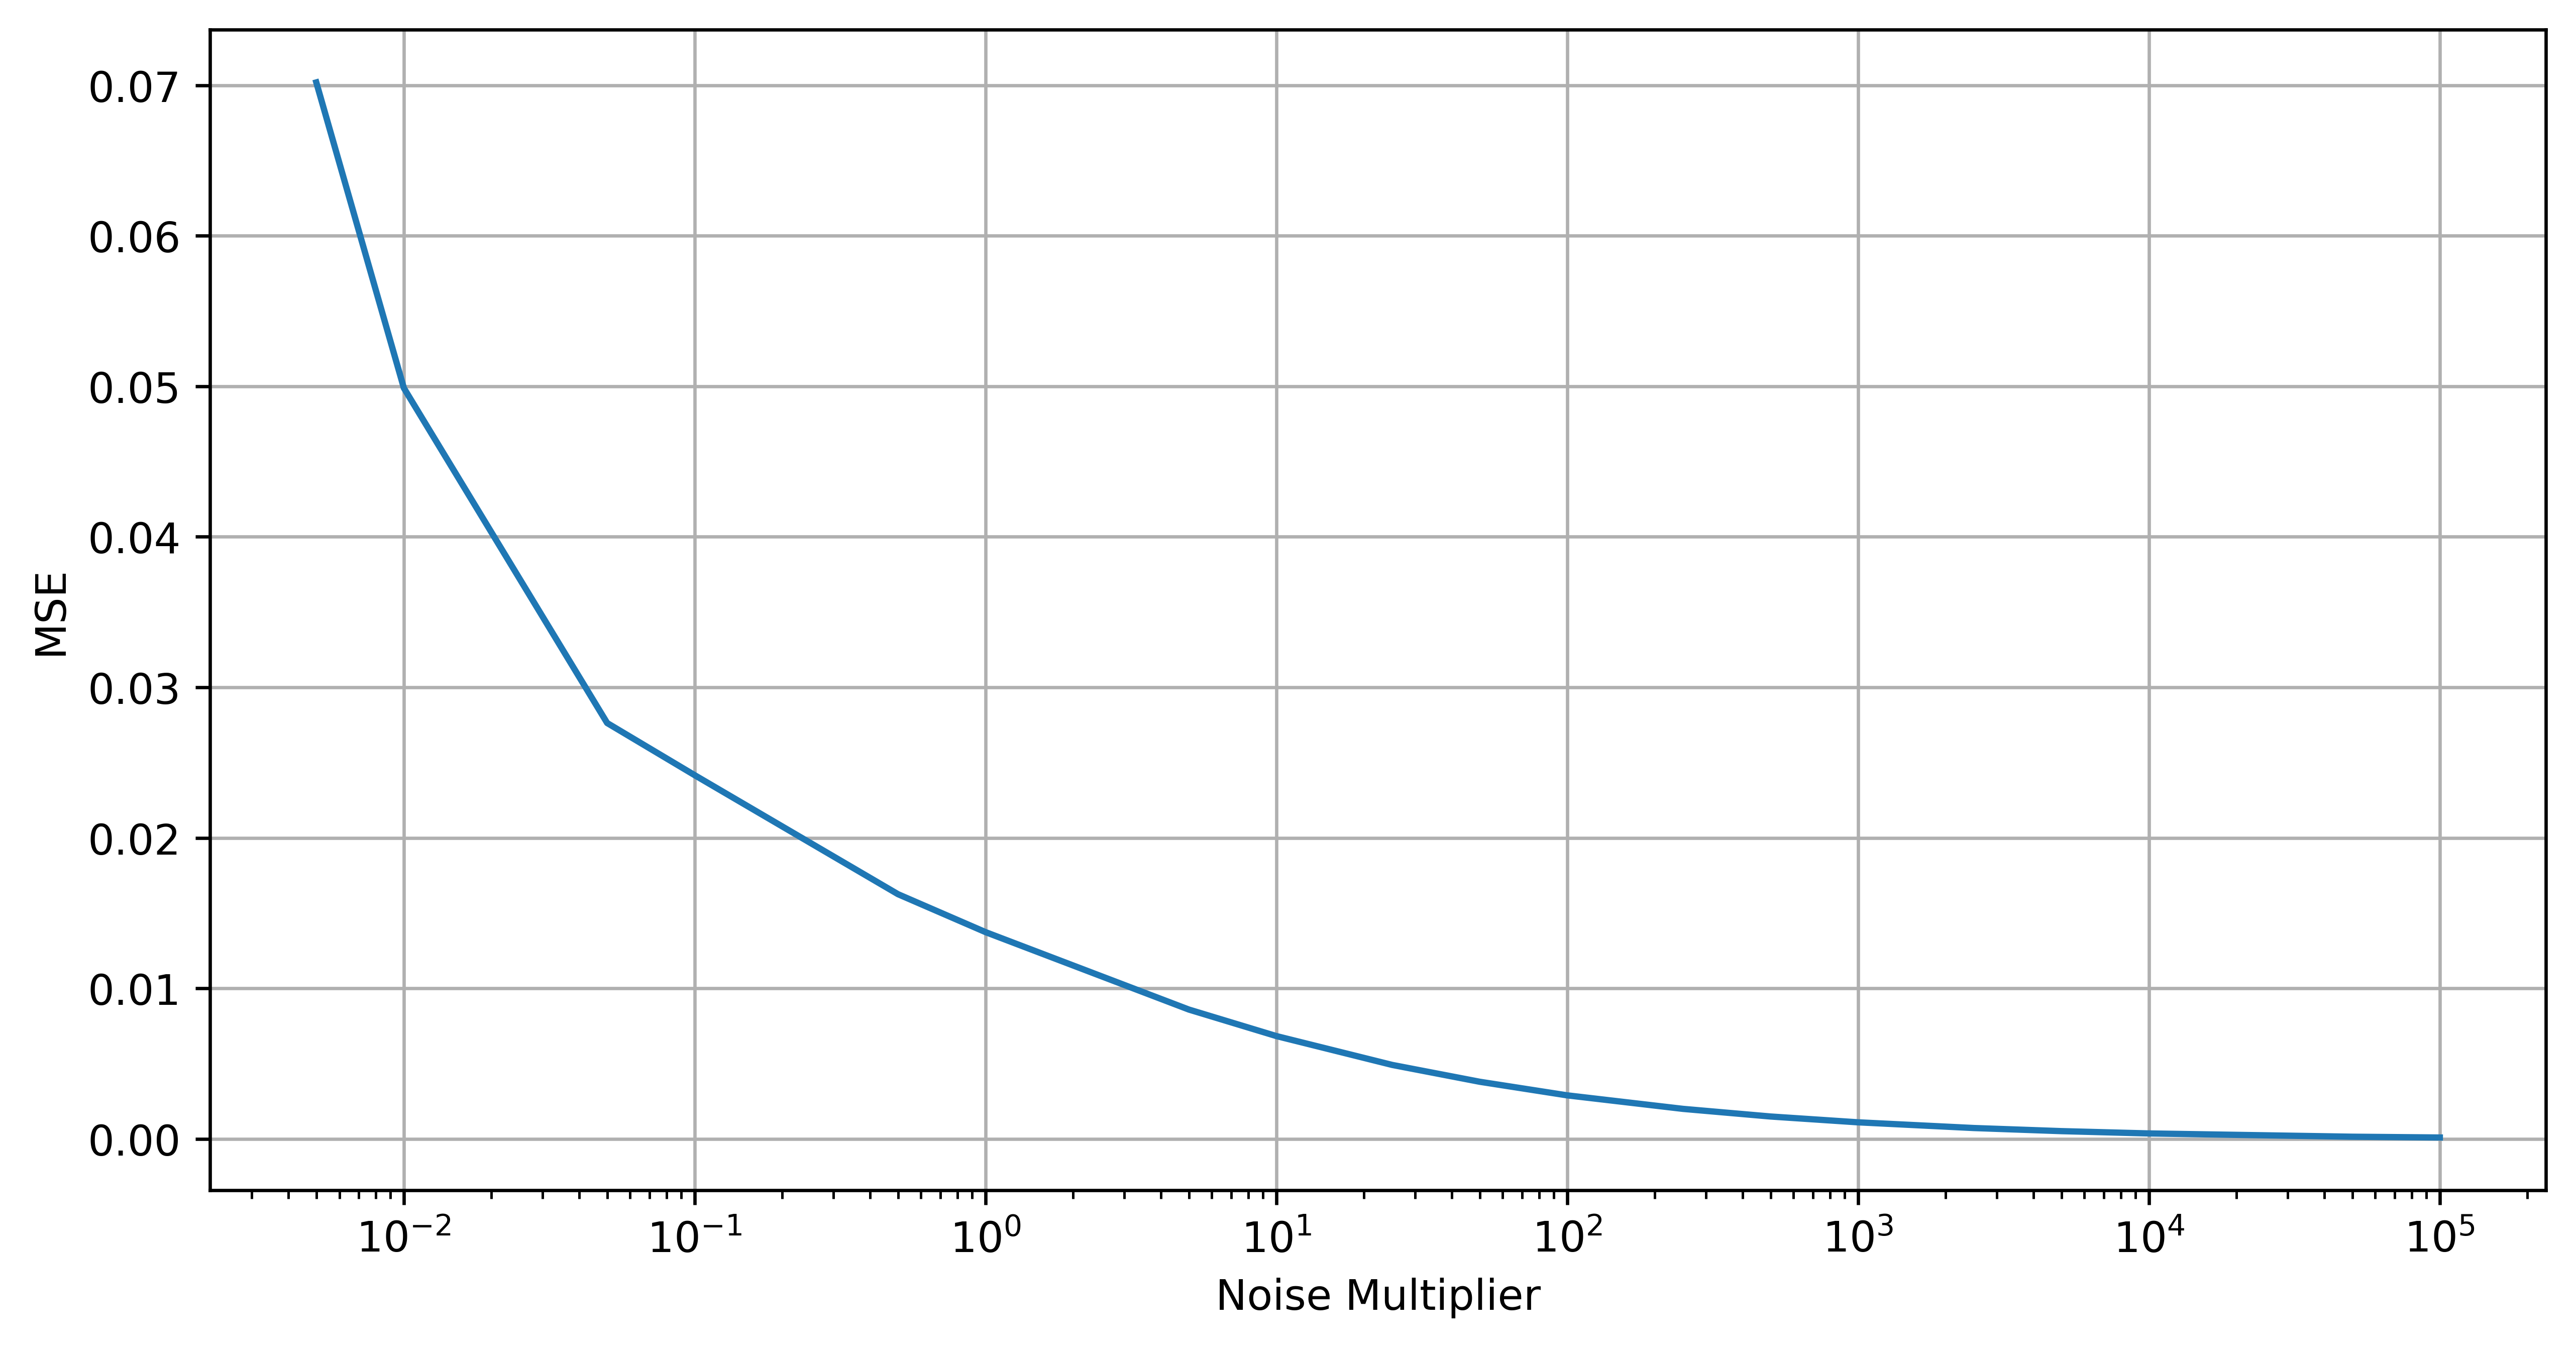

In [6]:
'''
100K -> 8.953647863846825e-05
50K -> 0.00014177729738696477
10K -> 0.0003594894723940614
5K -> 0.0005130321024650886
2.5K -> 0.0007190245681178468
1K -> 0.0010982061443412774
500 -> 0.0014846076914285453
250 -> 0.001991620386900288
100 -> 0.0028894964978128527
50 -> 0.003793108297619676
25- > 0.004912154894919946
10 -> 0.006828708576023453
5 -> 0.008590755165407712
1 -> 0.013735572933260888
0.5 -> 0.01625532506169161
0.1 -> 0.024161827876711544
0.05 -> 0.027628364637103612
0.01 -> 0.04988511961396432
0.005 -> 0.07019104366536899
0.0001 -> 16143.969353478773
'''
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)
y = linOperator.apply(image_tensor_)
y = np.random.poisson(y.cpu().detach() * noise_level) / noise_level

loss_list = [8.953647863846825e-05,
             0.00014177729738696477,
             0.0003594894723940614,
             0.0005130321024650886,
             0.0007190245681178468,
             0.0010982061443412774,
             0.0014846076914285453,
             0.001991620386900288,
             0.0028894964978128527,
             0.003793108297619676,
             0.004912154894919946,
             0.006828708576023453,
             0.008590755165407712,
             0.013735572933260888,
             0.01625532506169161,
             0.024161827876711544,
             0.027628364637103612,
             0.04988511961396432,
             0.07019104366536899]

noise_list = [100000,
              50000,
              10000,
              5000,
              2500,
              1000,
              500,
              250,
              100,
              50,
              25,
              10,
              5,
              1,
              0.5,
              0.1,
              0.05,
              0.01,
              0.005]
plt.figure(dpi = 600,figsize=(10, 5))
plt.semilogx(noise_list, loss_list)
#x axis is the SNR in dB scale 
plt.xlabel('Noise Multiplier')
plt.ylabel('MSE')
plt.grid()



In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 20*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 25
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
y = linOperator.apply(image_tensor_)
magnitude = torch.abs(y)
phase = torch.angle(y)
magnitude_np = magnitude.cpu().numpy()
noisy_magnitude_np = np.random.poisson(magnitude_np * noise_level) / noise_level
noisy_magnitude = torch.tensor(noisy_magnitude_np, dtype=torch.float64).to(y.device)
y = noisy_magnitude * torch.exp(1j * phase)


loss = Loss(linOperator,y)
model4 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model4.solve_multigrid()
model4.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 20*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
noise_level = 50
image = plt.imread('test_data/peppers.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)


multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
y = linOperator.apply(image_tensor_)
magnitude = torch.abs(y)
phase = torch.angle(y)
magnitude_np = magnitude.cpu().numpy()
noisy_magnitude_np = np.random.poisson(magnitude_np * noise_level) / noise_level
noisy_magnitude = torch.tensor(noisy_magnitude_np, dtype=torch.float64).to(y.device)
y = noisy_magnitude * torch.exp(1j * phase)


loss = Loss(linOperator,y)
model5 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model5.solve_multigrid()
model5.print_time()


In [ ]:
def extract_data(nested_list):
    result = []
    for item in nested_list:
        if isinstance(item, list):  # If the item is a list, recurse into it
            result.extend(extract_data(item))
        else:  # If the item is not a list, add it to the result
            result.append(item)
    return result


plt.figure(figsize=(10, 5),dpi = 200)
plt.semilogy(extract_data(model1.measures["loss"]),label = "Loss w/ noise level 1",color = 'blue')
plt.semilogy(extract_data(model2.measures["loss"]),label = "Loss w/ noise level 5",color = 'red')
plt.semilogy(extract_data(model3.measures["loss"]),label = "Loss w/ noise level 10",color = 'green')
plt.semilogy(extract_data(model4.measures["loss"]),label = "Loss w/ noise level 25",color = 'orange')
plt.semilogy(extract_data(model5.measures["loss"]),label = "Loss w/ noise level 50",color = 'purple')
plt.xlabel("Iterations")
plt.ylabel(r"$Log(\||A\hat{x}|-\sqrt{y}\|^2)$")
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
def unwrap_2d(phase):
    """
    Unwraps a 2D phase array using NumPy's 1D unwrap function.
    
    Parameters:
    phase (numpy array): The 2D phase array to be unwrapped.
    
    Returns:
    unwrapped_phase (numpy array): The 2D unwrapped phase array.
    """
    # Unwrap along the first axis (rows)
    unwrapped_phase = np.unwrap(phase, axis=0)
    
    # Unwrap along the second axis (columns)
    unwrapped_phase = np.unwrap(unwrapped_phase, axis=1)
    
    return unwrapped_phase

def plot_results(model,image):
    plt.figure(figsize=(18, 5),dpi = 200)    
    image = image[::,::]
    mean_img = np.mean(image)
    plt.subplot(1, 3, 1)
    plt.imshow(image,cmap='gray')
    plt.title(r"(a) Phase of GT $(\angle x)$")
    plt.colorbar()


    plt.subplot(1, 3, 2)
    phase = torch.angle(model.c_k[0,0,:,:].to('cpu'))
    phase = phase.numpy()
    phase = unwrap_2d(phase)
    phase += (mean_img-np.mean(phase))
    
    #phase = (phase - np.min(phase))/(np.max(phase) - np.min(phase))
    plt.imshow(phase,cmap = 'gray')
    plt.title(r"(b) Phase of Reconstruction $(\angle \hat{x})$")
    plt.colorbar()


    plt.subplot(1, 3, 3)
    error = np.abs(np.array(image)-np.array(phase))**2
    plt.imshow(error,cmap='gray')
    plt.title(r"(c) $||\angle x - \angle \hat{x}||^2$")
    plt.colorbar()
    plt.tight_layout()
    plt.savefig("poisson_folder/poisson0_0000001k.png")
    #plt.savefig("n_figs/new_result_img.png")
    #plt.savefig("n_figs/new_result_img.eps")
    mean_error = np.mean(error)
    print(mean_error)
    return None 

plot_results(model0_000001k,image)

In [ ]:
plot_results(model2,image)

In [ ]:
plot_results(model3,image)

In [ ]:
plot_results(model4,image)

In [ ]:
plot_results(model5,image)

In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 96
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('test_data/peppers.jpg')/ 256
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)
multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
loss = Loss(linOperator,linOperator.apply(image_tensor_))
model2 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model2.solve_multigrid()
model2.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 64
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('test_data/peppers.jpg')/ 256
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)
multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
loss = Loss(linOperator,linOperator.apply(image_tensor_))
model3 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model3.solve_multigrid()
model3.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 30, 30,40,300])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('test_data/peppers.jpg')/ 256
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)
multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
loss = Loss(linOperator,linOperator.apply(image_tensor_))
model4 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model4.solve_multigrid()
model4.print_time()


In [ ]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 10*np.array([0, 0, 0, 0, 0,0,400])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-6
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('test_data/peppers.jpg')/ 256
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)
multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
loss = Loss(linOperator,linOperator.apply(image_tensor_))
model2 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model2.solve_multigrid()
model2.print_time()


In [ ]:
model2loss = extract_data(model2.measures['loss'])
np.savetxt("model2loss.txt", model2loss, fmt="%f", delimiter=",")

In [ ]:
import gc
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) and obj.is_cuda:
            print(type(obj), obj.size())
    except Exception:
        pass

In [ ]:
model1loss = extract_data(model1.measures['loss'])
np.savetxt("model1loss.txt", model1loss, fmt="%f", delimiter=",")

In [ ]:
def extract_data(nested_list):
    result = []
    for item in nested_list:
        if isinstance(item, list):  # If the item is a list, recurse into it
            result.extend(extract_data(item))
        else:  # If the item is not a list, add it to the result
            result.append(item)
    return result


def unwrap_2d(phase):
    """
    Unwraps a 2D phase array using NumPy's 1D unwrap function.
    
    Parameters:
    phase (numpy array): The 2D phase array to be unwrapped.
    
    Returns:
    unwrapped_phase (numpy array): The 2D unwrapped phase array.
    """
    # Unwrap along the first axis (rows)
    unwrapped_phase = np.unwrap(phase, axis=0)
    
    # Unwrap along the second axis (columns)
    unwrapped_phase = np.unwrap(unwrapped_phase, axis=1)
    
    return unwrapped_phase

def plot_results(model,image):
    plt.figure(figsize=(18, 5),dpi = 200)    
    image = image[::,::]
    plt.subplot(1, 3, 1)
    plt.imshow(image,cmap='gray')
    plt.title(r"(a) Phase of GT $(\angle x)$")
    plt.colorbar()


    plt.subplot(1, 3, 2)
    phase = torch.angle(model.c_k[0,0,:,:].to('cpu'))
    phase = phase.numpy()
    phase = unwrap_2d(phase)
    
    #phase = (phase - np.min(phase))/(np.max(phase) - np.min(phase))
    plt.imshow(phase,cmap = 'gray')
    plt.title(r"(b) Phase of Reconstruction $(\angle \hat{x})$")
    plt.colorbar()


    plt.subplot(1, 3, 3)
    error = np.abs(np.array(image)-np.array(phase))**2
    error = np.abs(error-np.mean(error))
    plt.imshow(error,cmap='gray')
    plt.title(r"(c) $||\angle x - \angle \hat{x}||^2$")
    plt.colorbar()
    plt.tight_layout()
    #plt.savefig("n_figs/new_result_img.png")
    #plt.savefig("n_figs/new_result_img.eps")

    return None 

plot_results(model1,image)


In [ ]:
data1 = np.loadtxt("model1loss.txt", delimiter=",")
data2 = np.loadtxt("model2loss.txt", delimiter=",")

plt.figure(figsize=(18, 5),dpi = 200)
plt.semilogy(data1, label = "Multiresolution GD")
plt.semilogy(data2, label = "Vanilla GD")
plt.ylabel("Log-MSE")
plt.xlabel("Iterations")
plt.grid()
plt.legend()




In [ ]:
plt.figure(figsize=(10, 5),dpi = 200)
plt.semilogy(extract_data(model1.measures["loss"]),label = "Loss w/ 0 overlap",color = 'blue')
plt.semilogy(extract_data(model2.measures["loss"]),label = "Loss w/ 0.25 overlap",color = 'red')
plt.semilogy(extract_data(model3.measures["loss"]),label = "Loss w/ 0.5 overlap",color = 'green')
plt.semilogy(extract_data(model4.measures["loss"]),label = "Loss w/ 0.75 overlap",color = 'orange')
plt.xlabel("Iterations")
plt.ylabel(r"$Log(\||A\hat{x}|-\sqrt{y}\|^2)$")
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10, 5),dpi = 200)
plt.semilogy(extract_data(model1.lr_list),label = "Lr",color = 'red')
plt.xlabel("Iterations")
plt.ylabel(r"Learning Rate")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
max_scale = 7
max_probe_size = 32
max_shift = 8
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 40*np.array([0, 0, 0, 30, 10,10,100])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('images/peppers_reduced.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)
multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
loss = Loss(linOperator,linOperator.apply(image_tensor_))
model1 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model1.solve_multigrid()
model1.print_time()

In [ ]:
max_scale = 7
max_probe_size = 32
max_shift = 8
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 40*np.array([0, 0, 0, 0, 0,0,150])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-2
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('images/peppers_reduced.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)
multires = MultiRes(max_scale, device)
#loss = Loss(linOperator,linOperator.apply(image_tensor_), lmbda = lmbda)
loss = Loss(linOperator,linOperator.apply(image_tensor_))
model2 = MultiResSolver(multires, loss, LR = LR,
                        I_in = I_in,
                        I_out = I_out,
                        tol = tol,
                        tol_in = tol_in,
                        cycle = cycle,
                        l1_type = "l1_row")

model2.solve_multigrid()
model2.print_time()

In [ ]:
plt.figure(figsize=(10, 5),dpi = 200)
plt.semilogy(extract_data(model2.measures["loss"]),label = "Loss Classical GD",color = 'red')
plt.semilogy(extract_data(model1.measures["loss"]),label = "Loss Multiresolution GD",color = 'blue')
plt.xlabel("Iterations")
plt.ylabel(r"$Log(|A\hat{x}-y|^2)$")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()